# Computational Methods for Finance CW

## Data

we start inserting Yfinance library that make us able to downlond data from Yahoo answer.

In [163]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


we insert the matplotlib library because, we will upload it to manipulate our data

In [164]:
pip install -U matplotlib

Requirement already up-to-date: matplotlib in ./opt/anaconda3/lib/python3.8/site-packages (3.3.3)
Note: you may need to restart the kernel to use updated packages.


We must work on our data, we decide to uploaad some Python libraries to improve our analysis adding the possibility of insert some graphs for example.

Those are:
**yfinance** that is our data source, it conatins all our data.
**matplotlib** that give us the possibility of add graphs representing our data, this library works well with NumPy.
**Numpy** introduce the scientific language in our analysis adding complex calculus formulas, big matrices, and multi-dimensional arrays.
**pandas** is a useful library for the manipulation on the data, in particula can be useful in our analysis to manipulate time series of our stock.

The names after **as** in our code are the names with we can find our libraries on our Python.

We do not need to install before NumPy and pandas because they are yet present on our Python

In [165]:
import yfinance as yf
import matplotlib as mpl
import numpy as np
import pandas as pd

We decided to downloand and use as first database the American Express stocks, or **AXP** because it is the stock that we decide to use in our analysis. The Cboe Volatility Index, or **VIX** will show us the implicit market volatility expectation of 30 days.

In [166]:
initial_data = yf.download("AXP", start="2020-01-01", end="2020-10-30")

[*********************100%***********************]  1 of 1 completed


We need to see some tables represent the first part of our data to be sure to have the right starting data.
*first table* all the first part of our stock period (Adj Close, Close, High, Low, Open, and Volume), first 5 days.
*second table* all the last part of our stock period (Adj Close, Close, High, Low, Open, and Volume), last 5 days.
*third table* only the first prices of our database after dividends, first 5 days.
*fourth table* only the last prices of our database after dividends, last 5 days.

In [167]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,124.290001,124.570000,123.779999,124.489998,122.306564,2340400
2020-01-02,124.660004,126.269997,124.230003,125.849998,124.071274,2708000
2020-01-03,124.320000,125.099998,123.940002,124.599998,122.838936,2090600
2020-01-06,123.370003,124.160004,123.120003,124.059998,122.306564,2855200
2020-01-07,123.470001,124.400002,123.360001,123.410004,121.665756,2042300


In [168]:
initial_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-23,100.629997,103.639999,100.000000,100.980003,100.980003,8921200
2020-10-26,99.769997,100.099998,95.779999,96.879997,96.879997,5731500
2020-10-27,97.620003,97.699997,94.900002,94.930000,94.930000,3780300
2020-10-28,91.959999,93.570000,91.000000,91.599998,91.599998,7037800
2020-10-29,91.410004,92.230003,90.129997,91.070000,91.070000,5419500


In [169]:
initial_data['Adj Close'].head()

Date
2019-12-31    122.306564
2020-01-02    124.071274
2020-01-03    122.838936
2020-01-06    122.306564
2020-01-07    121.665756
Name: Adj Close, dtype: float64

In [170]:
initial_data['Adj Close'].tail()

Date
2020-10-23    100.980003
2020-10-26     96.879997
2020-10-27     94.930000
2020-10-28     91.599998
2020-10-29     91.070000
Name: Adj Close, dtype: float64

We try to understand our **initial_data** searching some info, there are not null cells and our data is clean. The only column that contains integers is the *Volume*, the others columns  contain numeric values with a floating radix point that occupying 64 bits of memory. The memory format show us how the number in our database can be accurate.

In [173]:
initial_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 211 entries, 2019-12-31 to 2020-10-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       211 non-null    float64
 1   High       211 non-null    float64
 2   Low        211 non-null    float64
 3   Close      211 non-null    float64
 4   Adj Close  211 non-null    float64
 5   Volume     211 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 11.5 KB


We create an addictional column in initial_data defining the returns of the stocks. The name of this column is **Rets**

In [175]:
initial_data['rets']=np.log(initial_data['Adj Close']/initial_data['Adj Close'].shift(1))

We decide to create another table called **data** that contain Adj Close and Rets values and we control with **info command** that it are not null cells/values. The results show data our data no not need to be clean because there are not null cells. However, the Dtype is the same, and in this case represent numeric values with a floating radix point that occupying 64 bits of memory. The memory format show us how the number in our database can be accurate. 

We control the output looking at the head and the tail of our new table. They must be the same tables of our last 2 tables.

In [176]:
data=initial_data[['Adj Close', 'rets']]
data.head()


,Adj Close,rets
Date,,
2019-12-31,122.306564,NaN
2020-01-02,124.071274,0.014325
2020-01-03,122.838936,-0.009982
2020-01-06,122.306564,-0.004343
2020-01-07,121.665756,-0.005253


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 152 entries, 2020-03-26 to 2020-10-29
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  152 non-null    float64
 1   rets       152 non-null    float64
 2   min        152 non-null    float64
 3   mean       152 non-null    float64
 4   std        152 non-null    float64
 5   median     152 non-null    float64
 6   max        152 non-null    float64
 7   ewma       152 non-null    float64
 8   SMA1       152 non-null    float64
 9   SMA2       152 non-null    float64
 10  positions  152 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 19.2 KB


We create a couple of graphs representing the 2 columns of our *data* table.
We decide:
*the size of the figures*, where the first number represent the lenght of the X axis (10) and the second the lenght of Y axis or the height of the figure (6).
*the subplots*, is *true* because we would like to have 2 different graphs, with *false* we would obtained only a cumulative graph.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

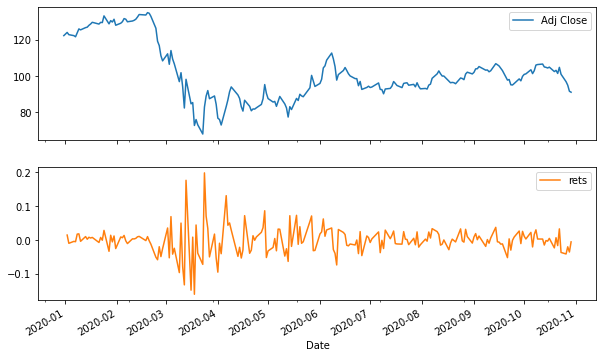

In [87]:
data.plot(figsize=(10, 6), subplots=True)

We inserted a **summary table** of AXP stock between 1st January 2020 and 30th October of this year. This summary present the mean, the standard deviation, the minimum and maximum value ,and the percentiles. In our code the *round* define the width of every column of our table. In this case is 10.

In [88]:
data.describe().round(10)

,Adj Close,rets
count,211.000000,210.000000
mean,101.370137,-0.001404
std,15.287327,0.040650
min,67.985336,-0.160388
25%,92.617180,-0.019827
50%,98.212311,-0.000557
75%,106.148136,0.015992
max,134.994659,0.197885


We create a **window** to observe the data inserted in **data** table, in this window will insert min, mean, std, median, max and ewma. 
In particular, *window=window* identify all the data day to day. 


In [183]:
window = 10
sym='Adj Close'
data['min'] = data[sym].rolling(window=window).min()
data['mean'] = data[sym].rolling(window=window).mean()
data['std'] = data[sym].rolling(window=window).std()
data['median'] = data[sym].rolling(window=window).median()
data['max'] = data[sym].rolling(window=window).max()
data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()
data.dropna().head()

,Adj Close,rets,min,mean,std,median,max,ewma
Date,,,,,,,,
2020-01-14,126.979584,0.002021,121.665756,124.214219,1.961719,123.918461,126.979584,126.835439
2020-01-15,127.985168,0.007888,121.665756,124.782079,2.160024,124.776165,127.985168,127.697736
2020-01-16,128.704849,0.005607,121.665756,125.245437,2.465928,125.742310,128.704849,128.453071
2020-01-17,129.661148,0.007403,121.665756,125.927658,2.662084,126.363403,129.661148,129.359129
2020-01-21,128.685135,-0.007556,121.665756,126.565515,2.454089,126.851414,129.661148,128.853633


The graph below show the performance of **min, mean, and max** correlate with the final value of the stock. We can notice that there are not outliers in our database.
*iloc[]* define for what parts of the stock performance we would like to observe the addictional lines. In this case we select all the data. With *plot*, as we said before, is possible to define the plot dimensions, with *style*, the color of the axis writing the first letter of the color name with --, we chose yellow, red and green.
Moreover, *lw* define the trasparency and thickness in the first case of the addictional lines, in the second one of the stock movements.


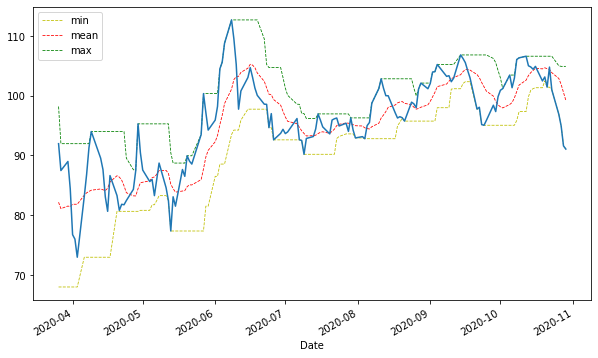

In [215]:
ax = data[['min', 'mean', 'max']].iloc[-2000:].plot(figsize=(10, 6), style=['y--', 'r--', 'g--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax, lw=1.5);

We create a couple of columns that contains the mean (.mean()) of the value in 2 different intervals. The first is of 20 days (window=20), the second of 60 days (window=60).
In the line 93 instead we will represent the results of these two new columns correlate with the stock movements. 

In [203]:
data['SMA1'] = data[sym].rolling(window=20).mean()
data['SMA2'] = data[sym].rolling(window=60).mean()
data[[sym, 'SMA1', 'SMA2']].tail()

,Adj Close,SMA1,SMA2
Date,,,
2020-10-23,100.980003,102.820296,100.776664
2020-10-26,96.879997,102.743848,100.842467
2020-10-27,94.930000,102.623177,100.872118
2020-10-28,91.599998,102.211526,100.852078
2020-10-29,91.070000,101.719599,100.786691


<AxesSubplot:xlabel='Date'>

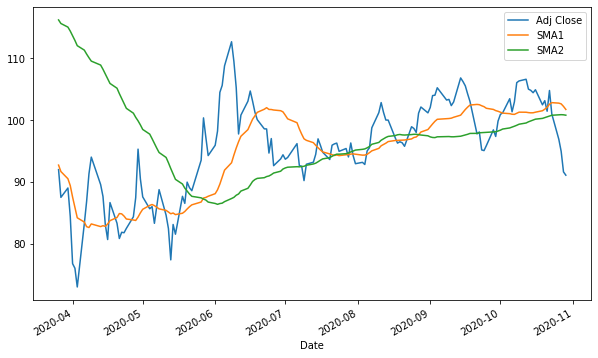

In [216]:
data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

In the graph below we insert a **position** line that represent the correlation of position between SMA1 and SMA2.
The *set_bbox_to_anchor* define the position of the *legend*

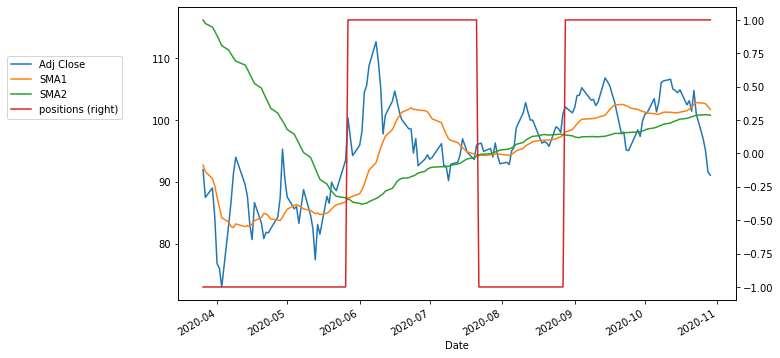

In [217]:
data.dropna(inplace=True)
data['positions'] = np.where(data['SMA1'] > data['SMA2'],1,-1)
ax = data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((-0.09, 0.85))

## historical volatility

I imported *scipy.stats*, *matplotlib.pyplot*, and *os* because are necessaries to calculate our volatility. 

In [218]:
import matplotlib.pyplot as plt
import scipy.stats as si
import os

**Historical Volatility**

I calculate the Historical Volatility of the stock and before the spot price.
When we print the results, the first part in the in the parenthesis define what to write, the second one the value that we must observe.

In [219]:
S = data['Adj Close'][-1]
print('The spot price is $', round(S,2), '.')

The spot price is $ 91.07 .


In [97]:
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
vol_h = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol_h*100,2), '%')

The annualised volatility is 50.45 %


# Option Pricing 

One month european call option

# Monte Carlo

**Data Inputs** 
We install *option-price* that is an option price calculator library because it is necessary to run the model.
Moreove we upload *Option* and *datetime*

In [220]:
pip install option-price

Note: you may need to restart the kernel to use updated packages.


In [221]:
from optionprice import Option
from datetime import datetime

We start to run the **Monte Carlo Model**, in particular, we define the variables of the formula, the **formula**.

In [222]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

We insert the **features** of our European call option

In [101]:
S0 = S           # spot stock price
K = S*1.05              # strike
T = 1/12                # maturity 
r = 0.01                # risk free rate 
sigma = vol_h               # diffusion coefficient or volatility 
q=0.0138 #divident yield

We start the simulation with a defined number of random values

In [150]:
S_sim = mcs_simulation_np(10000)

We define the **array** with the random data. With *transpose* command we invert rows and columns of the data. At the end we will show the results.

In [227]:
S_sim = np.transpose(S_sim)
S_sim

array([[ 91.06999969,  91.0609817 ,  91.02426513, ..., 114.2930936 ,
        114.35590549, 114.392201  ],
       [ 91.06999969,  91.10388888,  90.90982807, ..., 109.33535458,
        109.22138837, 109.30821501],
       [ 91.06999969,  91.0999526 ,  91.04484581, ...,  87.02924143,
         87.00650886,  86.9980451 ],
       ...,
       [ 91.06999969,  91.08699025,  91.03266063, ..., 100.77354743,
        100.94509404, 101.14345572],
       [ 91.06999969,  91.12633231,  91.38529952, ...,  99.97979688,
         99.84398652, 100.29535023],
       [ 91.06999969,  91.02899825,  91.00703384, ...,  86.12957194,
         86.15855403,  86.19313936]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

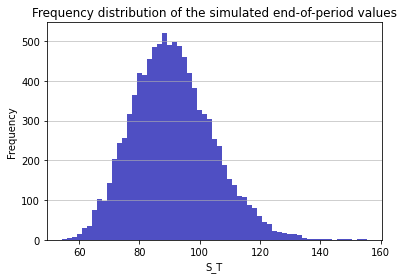

In [228]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S_sim[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-period values')

We find the mean value of the Option

In [230]:
c = np.mean(np.maximum(S_sim[:,-1] - K,0))
print('European call', str(c))

European call 3.433380113594488


## Black Scholes Merton Model

To start with the **Black Scholes Merton Model** we define the variables in the function, it is not necessary to create them because they has been created previously.
We insert the formula to find the call option value.

In [231]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    
    return option_value

In [232]:
euro_option_bsm(S0, K, T, r, q, sigma, 'call')

3.4286813595159416

With the code below we define the fields of the *European call graph*, in particular **S_s** define the x-axis, *80* is the first value *160* the last and *21* the distribution in the axis. **cp** define the color of the lines *1*

In [263]:
S_s = np.linspace(80,160,21)
cp = np.zeros((len(S_s),1))
for i in range(len(S_s)):
    cp[i] = euro_option_bsm(S_s[i], K, T, r,q, sigma, 'call')

We insert a **graph** defining the graphic distance between the two lines, the name of the axises and the legend.

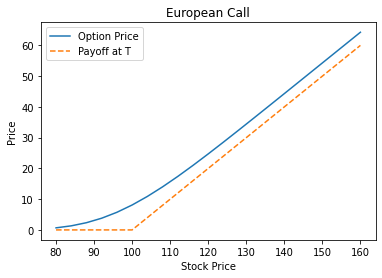

In [268]:
fig = plt.figure()
plt.plot(S_s, cp, '-')
plt.plot(S_s, np.maximum(S_s-100,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

## Greeks

We define at least five Greeks to better understand some characteristics of pur European call option, in particular the correlation between the option and the underlying asset.

We describe in Delta Greek what has been done to define Greeks, it will be the same in the others Greeks. 

## Delta 

We insert the fields of out Option, and the equation to find Delta

In [287]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)

    
    return delta

We show Delta

In [288]:
delta(S0, K, T, r, q, sigma, 'call')

0.3953033397613688

As we did before, we define the graph fields, the dimension of X-axis, the color of the line, and what the line represent.
After, we will define the legend, the names of axises, and the title and we show the graph.

In [289]:
S_del = np.linspace(50,160,11)
Delta_Call = np.zeros((len(S_del),1))

for i in range(len(S_del)):
    Delta_Call [i] = delta(S_del[i], K, T, r, q, sigma, 'call')

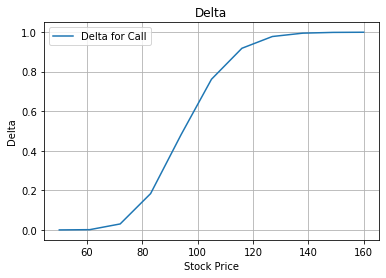

In [290]:
fig = plt.figure()
plt.plot(S_del, Delta_Call, '-')

plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call'])

## Gamma

In [291]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(-r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * T)
    
    return gamma

In [292]:
gamma(S, K, T, r, q, sigma, 'call')

0.10052883294409497

In [293]:
S_g = np.linspace(50,150,11)
Gamma = np.zeros((len(S_g),1))
for i in range(len(S_g)):
    Gamma [i] = gamma(S_g[i], 100, 1, 0.05, 0.03, 0.25, 'call')

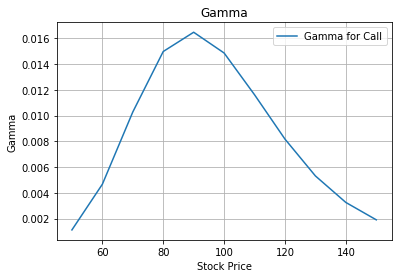

In [294]:
fig = plt.figure()
plt.plot(S_g, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call'])

## Rho

In [295]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    
    return rho

In [296]:
rho(S, K, T, r, q, sigma, 'call')

2.714299472659576

In [297]:
rr = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(rr),1))
Rho_Put = np.zeros((len(rr),1))
for i in range(len(rr)):
    Rho_Call [i] = rho(100, 100, 1, rr[i], 0.03, 0.25, 'call')

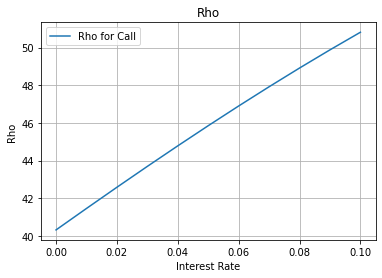

In [121]:
fig = plt.figure()
plt.plot(rr, Rho_Call, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call'])

## Speed

In [122]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * T) * (d1 + vol * np.sqrt(T))
    
    return speed

In [123]:
speed(S, K, T, r, q, sigma, 'call')

-0.00025961100468227874

In [124]:
S_s = np.linspace(50,150,11)
Speed = np.zeros((len(S_s),1))
for i in range(len(S_s)):
    Speed [i] = speed(S_s[i], K, T, r, q, sigma, 'call')

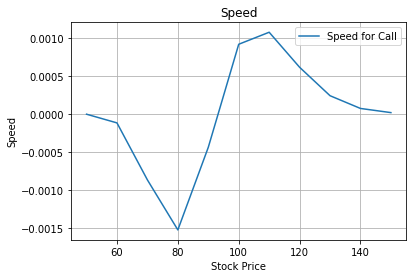

In [125]:
fig = plt.figure()
plt.plot(S_s, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call'])

## Theta

In [126]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    
    return theta

In [127]:
theta(S, K, T, r, q, sigma, 'call')

30.452985156556814

In [161]:
(1/12)*theta(S, K, T, r, q, sigma, 'call')

2.537748763046401

In [162]:
(1/252)*theta(S, K, T, r, q, sigma, 'call')

0.12084517919268577

In [129]:
T_th = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T_th),1))
Theta_Put = np.zeros((len(T_th),1))
for i in range(len(T_th)):
    Theta_Call [i] = theta(S, K, T_th[i], r, q, sigma, 'call')

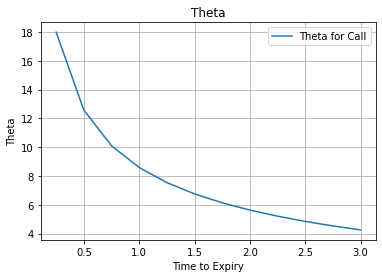

In [130]:
fig = plt.figure()
plt.plot(T_th, Theta_Call, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call'])

## Vega

In [131]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [132]:
vega(S, K, T, r, q, sigma, 'call')

10.116302524108383

In [133]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(S, K, T, r, q, vol[i], 'call')

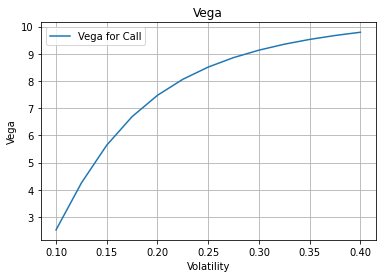

In [134]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call'])